<a href="https://colab.research.google.com/github/Cammie-Lin/Brazil-Patient-No-show/blob/main/No_Show_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Univariate Analysis

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Cleaning**

In [44]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/KaggleV2-May-2016.csv")
df = df.rename(columns={'Handcap': 'Handicap'})  #typo
df = df.rename(columns={'Hipertension': 'Hypertension'})   #typo

#transfer into datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

#waitingdays=appointmentday-scheduledday to see how many days patients waited
df['WaitingDays'] = (df['AppointmentDay'].dt.normalize() - df['ScheduledDay'].dt.normalize()).dt.days
df['Neighbourhood'].nunique()
df['Neighbourhood'].value_counts()

#too see abnormal gender values
print(df[df['Age'] < 0])
print(df[df['Age'] > 100])
#remove abnormal values
df = df[(df['Age'] >= 0) & (df['Age'] < 115)]



          PatientId  AppointmentID Gender              ScheduledDay  \
99832  4.659432e+14        5775010      F 2016-06-06 08:58:13+00:00   

                 AppointmentDay  Age Neighbourhood  Scholarship  Hypertension  \
99832 2016-06-06 00:00:00+00:00   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handicap  SMS_received No-show  WaitingDays  
99832         0           0         0             0      No            0  
          PatientId  AppointmentID Gender              ScheduledDay  \
58014  9.762948e+14        5651757      F 2016-05-03 09:14:53+00:00   
63912  3.196321e+13        5700278      F 2016-05-16 09:17:44+00:00   
63915  3.196321e+13        5700279      F 2016-05-16 09:17:44+00:00   
68127  3.196321e+13        5562812      F 2016-04-08 14:29:17+00:00   
76284  3.196321e+13        5744037      F 2016-05-30 09:44:51+00:00   
90372  2.342836e+11        5751563      F 2016-05-31 10:19:49+00:00   
97666  7.482346e+14        5717451      F 2016-

# **No-show Rate**

About 20.2% of patients did not show up.

No-show
No     88205
Yes    22316
Name: count, dtype: int64
No-show
No     0.798084
Yes    0.201916
Name: proportion, dtype: float64


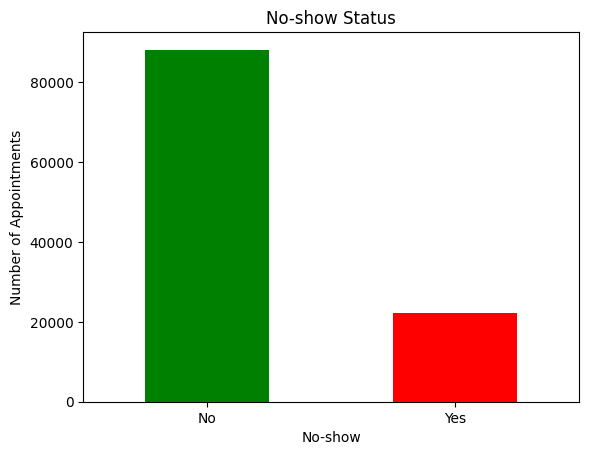

In [45]:
import matplotlib.pyplot as plt
#counts
print(df['No-show'].value_counts())

#percentage
print(df['No-show'].value_counts(normalize=True))

#generate the table
df['No-show'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('No-show Status')
plt.xticks(rotation=0)
plt.ylabel('Number of Appointments')
plt.show()

# **Population Variables**

# **1.Age**

While it seemed reasonable to have 3,539 one-year-old children, it was highly unlikely that there were five 115-year-old individuals in the same city. Therefore, I removed the data of these patients.

count    110521.000000
mean         37.085694
std          23.104606
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: Age, dtype: float64
Age
0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
97       11
98        6
100       4
102       2
99        1
Name: count, Length: 102, dtype: int64


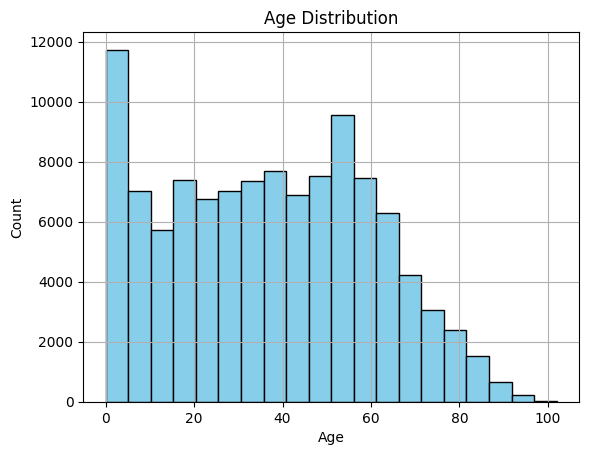

In [46]:
import matplotlib.pyplot as plt
#Descriptive Statistics
print(df['Age'].describe())

#to see how many people at different ages
print(df['Age'].value_counts())

#generate a histogram
df['Age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

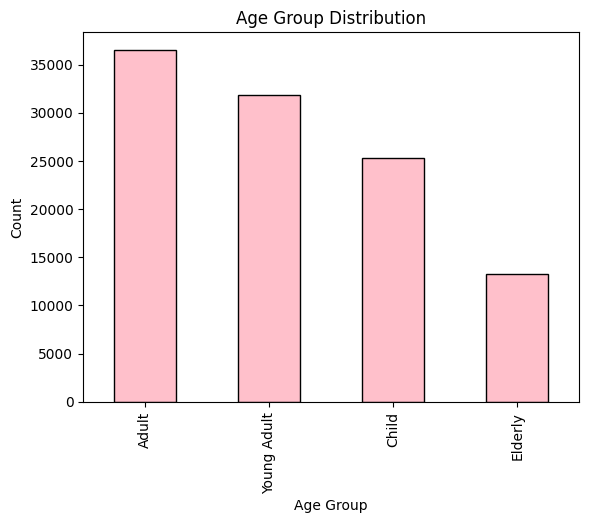

In [47]:
#label different ages
bins = [0, 18, 40, 65, 100]
labels = ['Child', 'Young Adult', 'Adult', 'Elderly']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
df['AgeGroup'].value_counts().plot(kind='bar', color='pink', edgecolor='black')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

Conclusion: Adult > Young Adult > Child > Elderly (Numerically)

In [48]:
#bining
import matplotlib.pyplot as plt
bins = [0, 18, 40, 65, 100]
labels = ['Child', 'Young Adult', 'Adult', 'Elderly']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)


print(df.groupby('AgeGroup')['No-show'].value_counts(normalize=True).unstack())

No-show            No       Yes
AgeGroup                       
Child        0.774628  0.225372
Young Adult  0.768206  0.231794
Adult        0.821274  0.178726
Elderly      0.844817  0.155183


/tmp/ipython-input-2794898589.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AgeGroup')['No-show'].value_counts(normalize=True).unstack())


Conclusion: The “Young Adult” age group has the highest no-show rate, and the “Elderly” group shows the lowest no-show rate.

# **2.Gender**

In [49]:
#gender distribution
print(df['Gender'].describe())
print(df['Gender'].value_counts())
print(df['Gender'].value_counts(normalize=True))

#no show by gender
print(df.groupby('Gender')['No-show'].value_counts()) #how many female or male were absent
print(df.groupby('Gender')['No-show'].value_counts(normalize=True).unstack()) #what percentage of female or male absence


count     110521
unique         2
top            F
freq       71834
Name: Gender, dtype: object
Gender
F    71834
M    38687
Name: count, dtype: int64
Gender
F    0.649958
M    0.350042
Name: proportion, dtype: float64
Gender  No-show
F       No         57243
        Yes        14591
M       No         30962
        Yes         7725
Name: count, dtype: int64
No-show        No       Yes
Gender                     
F        0.796879  0.203121
M        0.800321  0.199679


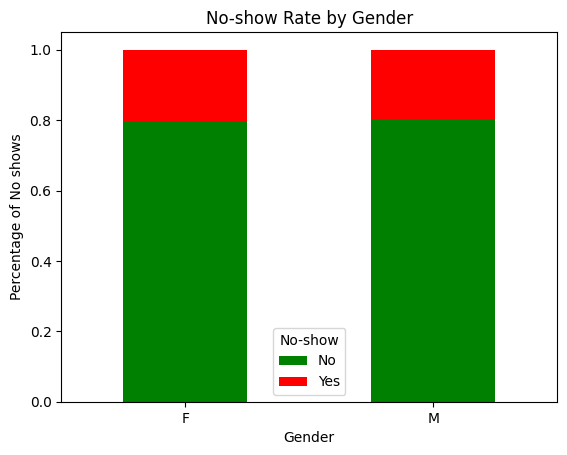

In [50]:
#generate the chart
df.groupby('Gender')['No-show'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('No-show Rate by Gender')
plt.xticks(rotation=0)
plt.ylabel('Percentage of No shows')
plt.show()

Conclusion: Among all appointments, around 65% were scheduled by female patients and 35% by male patients. 20.3% female and 19.9% male did not show up.

# **Appointment Information Variables**

# **1.Waiting Days**

In [51]:
print(df['WaitingDays'].describe())

count    110521.000000
mean         10.183721
std          15.255082
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: WaitingDays, dtype: float64


count    110516.000000
mean         10.184272
std          15.255201
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: WaitingDays, dtype: float64


/tmp/ipython-input-3439145742.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_rate = df.groupby('WaitGroup')['No-show'].value_counts(normalize=True).unstack().fillna(0)


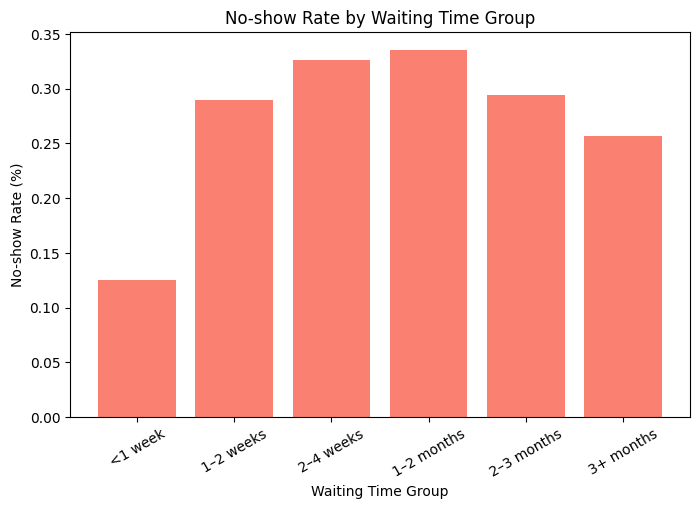

In [52]:
#remove abnormal waitingdays
df=df[df['WaitingDays'] >=0]
print(df['WaitingDays'].describe())

#to see which interval has the highest rate of patient absence based on the waiting days
bins = [0, 7, 14, 30, 60, 90, df['WaitingDays'].max()]
labels = ['<1 week', '1–2 weeks', '2–4 weeks', '1–2 months', '2–3 months', '3+ months']
df['WaitGroup'] = pd.cut(df['WaitingDays'], bins=bins, labels=labels, right=False)
group_rate = df.groupby('WaitGroup')['No-show'].value_counts(normalize=True).unstack().fillna(0)

plt.figure(figsize=(8, 5))
plt.bar(group_rate.index, group_rate['Yes'], color='salmon')
plt.title('No-show Rate by Waiting Time Group')
plt.ylabel('No-show Rate (%)')
plt.xlabel('Waiting Time Group')
plt.xticks(rotation=30)
plt.show()


Conclusion: The patients who waited for 1-2 months had the highest absence rate.

# **2.SMS_received**

In [53]:
print(df['SMS_received'].describe())
print(df['SMS_received'].value_counts())
print(df['SMS_received'].value_counts(normalize=True))

count    110516.000000
mean          0.321049
std           0.466882
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: SMS_received, dtype: float64
SMS_received
0    75035
1    35481
Name: count, dtype: int64
SMS_received
0    0.678951
1    0.321049
Name: proportion, dtype: float64


Conclusion: About 68% individuals did not receive SMS, which is high.

   SMS_received  total  no_show_rate
0             0  75035      0.166949
1             1  35481      0.275753


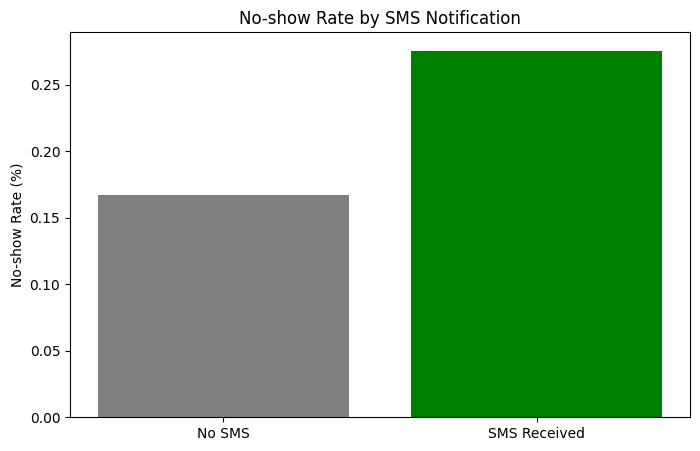

In [54]:
sms_stats = df.groupby('SMS_received').agg(total = ('No-show', 'count'),no_show_rate = ('No-show', lambda x: (x == 'Yes').mean())).reset_index()
print(sms_stats)



plt.figure(figsize=(8, 5))
rates = df.groupby('SMS_received')['No-show'].apply(lambda x: (x == 'Yes').mean())
plt.bar(rates.index, rates.values, color=['gray', 'green'])
plt.title('No-show Rate by SMS Notification')
plt.ylabel('No-show Rate (%)')
plt.xticks([0, 1], ['No SMS', 'SMS Received'])
plt.show()



Conclusion: Patients who received SMS reminders had a higher overall no-show rate, likely because messages were primarily sent to high-risk groups.

# **Health and Social Varaiables**

# **1.Scholarship**

In [55]:
print(df['Scholarship'].describe())
print(df['Scholarship'].value_counts())
print(df['Scholarship'].value_counts(normalize=True))

count    110516.000000
mean          0.098275
std           0.297688
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Scholarship, dtype: float64
Scholarship
0    99655
1    10861
Name: count, dtype: int64
Scholarship
0    0.901725
1    0.098275
Name: proportion, dtype: float64


   Scholarship  total  no_show_rate
0            0  99655      0.198013
1            1  10861      0.237363


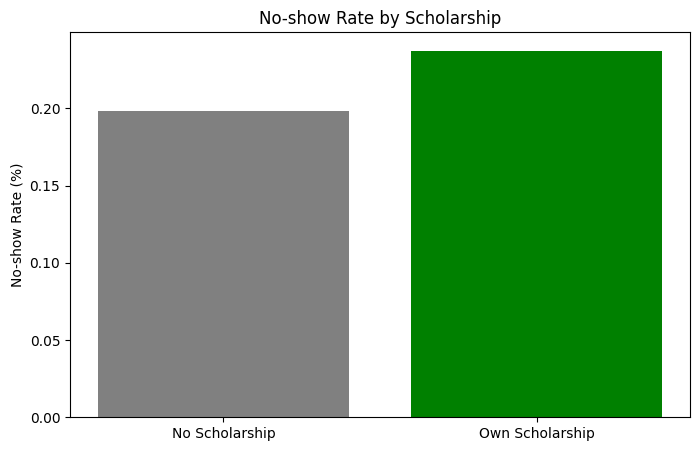

In [56]:
scholarship_status = df.groupby('Scholarship').agg(total = ('No-show', 'count'),no_show_rate = ('No-show', lambda x: (x == 'Yes').mean())).reset_index()
print(scholarship_status)


plt.figure(figsize=(8, 5))
rates = df.groupby('Scholarship')['No-show'].apply(lambda x: (x == 'Yes').mean())
plt.bar(rates.index, rates.values, color=['gray', 'green'])
plt.title('No-show Rate by Scholarship')
plt.ylabel('No-show Rate (%)')
plt.xticks([0, 1], ['No Scholarship', 'Own Scholarship'])
plt.show()

Conclusion: 90% individuals did not have scholarship, and the people who own scholarship had higher absence rate.

# **2.Hypertension/Diabetes/Alchoholism/Handicap**

Hypertension: count    110516.000000
mean          0.197257
std           0.397929
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Hypertension, dtype: float64
Hypertension: Hypertension
0    88716
1    21800
Name: count, dtype: int64
Hypertension: Hypertension
0    0.802743
1    0.197257
Name: proportion, dtype: float64
Diabetes: count    110516.000000
mean          0.071872
std           0.258277
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Diabetes, dtype: float64
Diabetes: Diabetes
0    102573
1      7943
Name: count, dtype: int64
Diabetes: Diabetes
0    0.928128
1    0.071872
Name: proportion, dtype: float64
Alcoholism: count    110516.000000
mean          0.030403
std           0.171694
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Alcoholism, dtype: float64
A

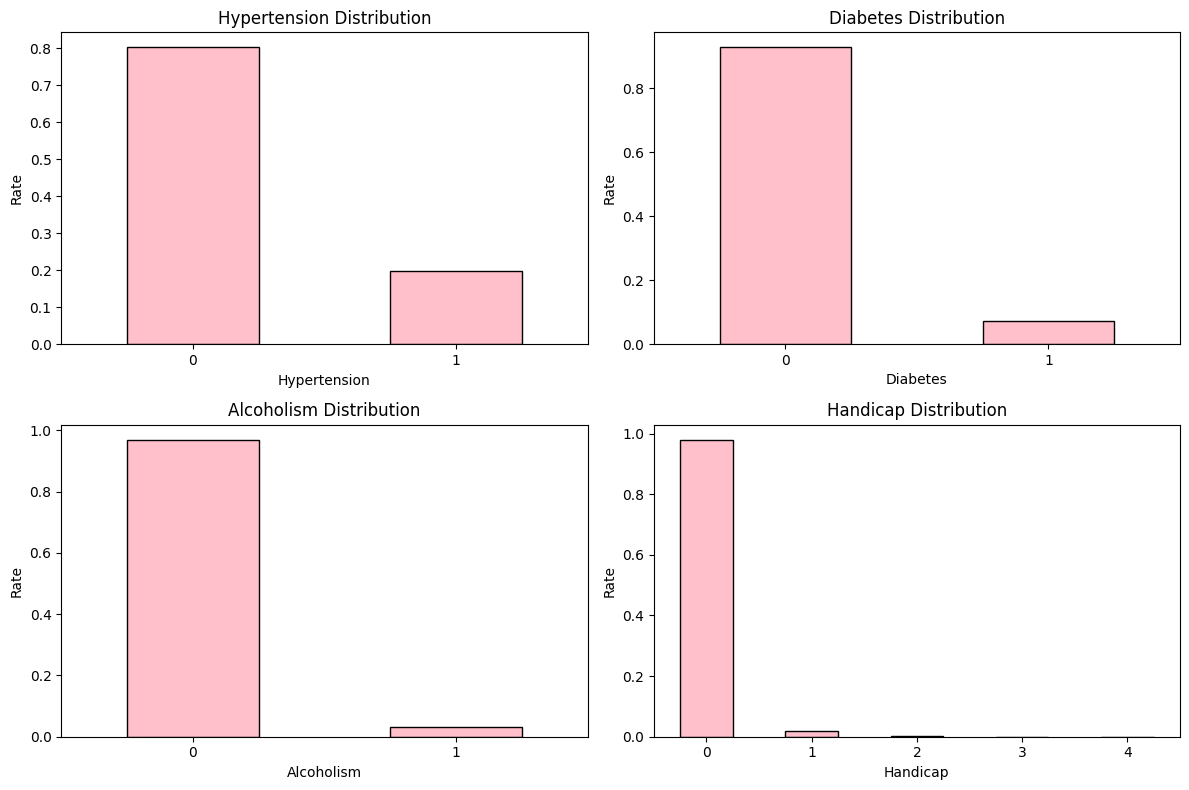

In [66]:
for col in ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']:
  print(f"{col}: {df[col].describe()}")
  print(f"{col}: {df[col].value_counts()}")
  print(f"{col}: {df[col].value_counts(normalize=True)}")


cols = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']

plt.figure(figsize=(12, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    df[col].value_counts(normalize=1).sort_index().plot(kind='bar', color='pink', edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Rate')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Conclusion: Most of appointmented patients did not have hipertension, diabetes, alcoholism and handicap.

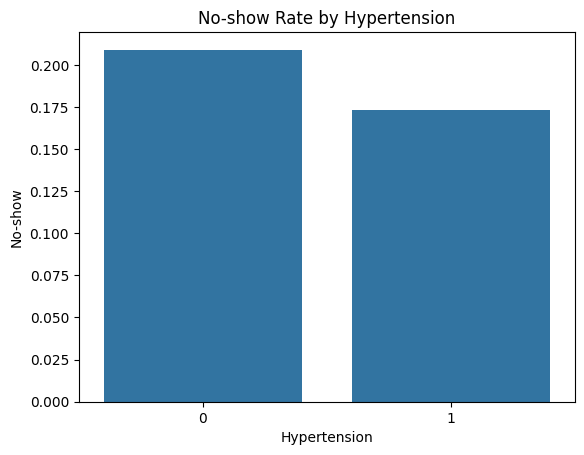

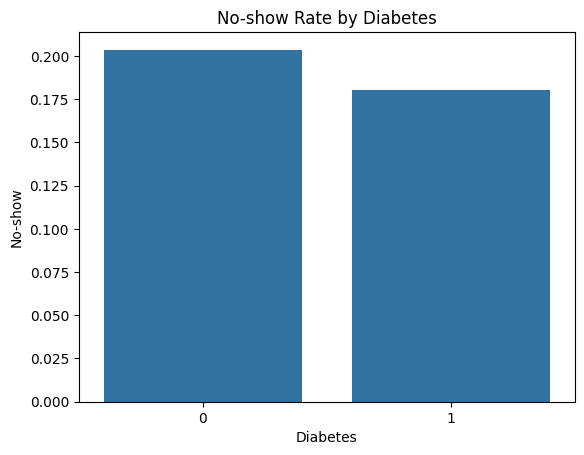

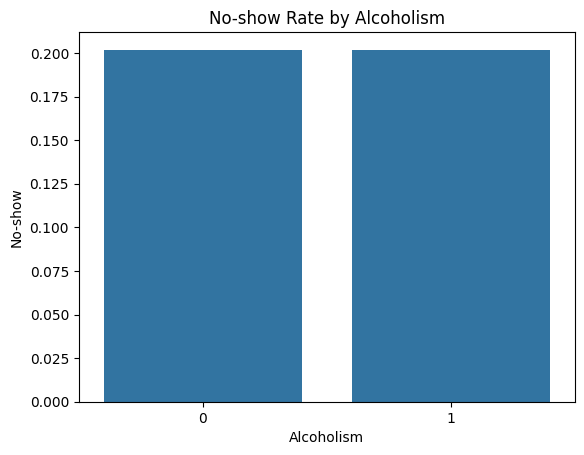

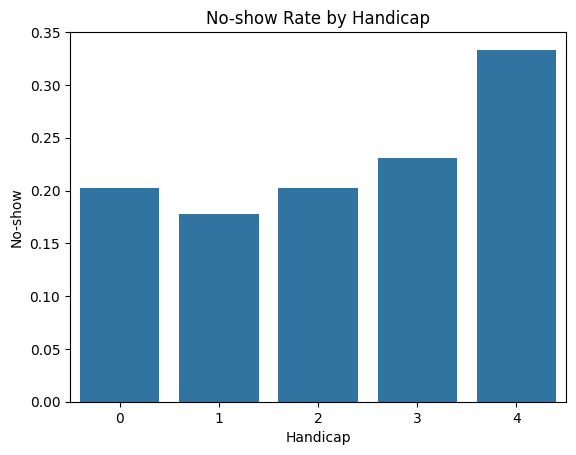

In [67]:
def plot_no_show_rate(df, col):
    temp = df.groupby(col)['No-show'].apply(lambda x: (x == 'Yes').mean()).reset_index()
    sns.barplot(x=col, y='No-show', data=temp)
    plt.title(f'No-show Rate by {col}')
    plt.show()
for col in ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']:
    plot_no_show_rate(df, col)


Conclusion: Patients with hypertension or diabetes are more likely to be absent while alcoholism has the minimal difference in absence rate. The absence rate increases as the degree of handicap rises.

# **Geographic Variable**

# **1.Neighbourhood**

count             110516
unique                81
top       JARDIM CAMBURI
freq                7717
Name: Neighbourhood, dtype: object
Neighbourhood
JARDIM CAMBURI                 0.069827
MARIA ORTIZ                    0.052526
RESISTÊNCIA                    0.040085
JARDIM DA PENHA                0.035081
ITARARÉ                        0.031796
                                 ...   
ILHA DO BOI                    0.000317
ILHA DO FRADE                  0.000090
AEROPORTO                      0.000072
ILHAS OCEÂNICAS DE TRINDADE    0.000018
PARQUE INDUSTRIAL              0.000009
Name: proportion, Length: 81, dtype: float64


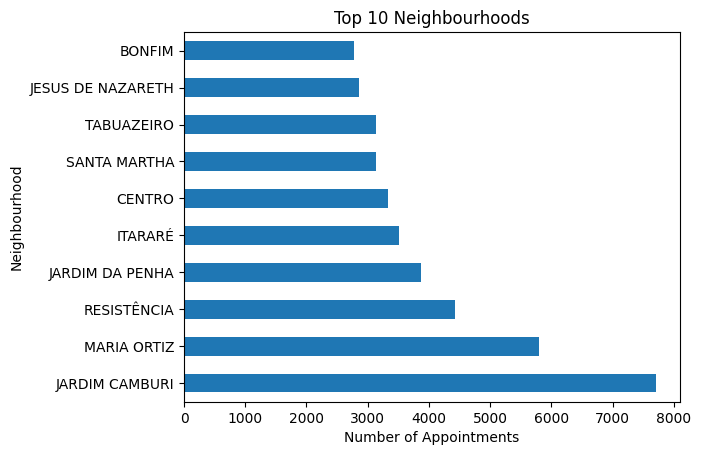

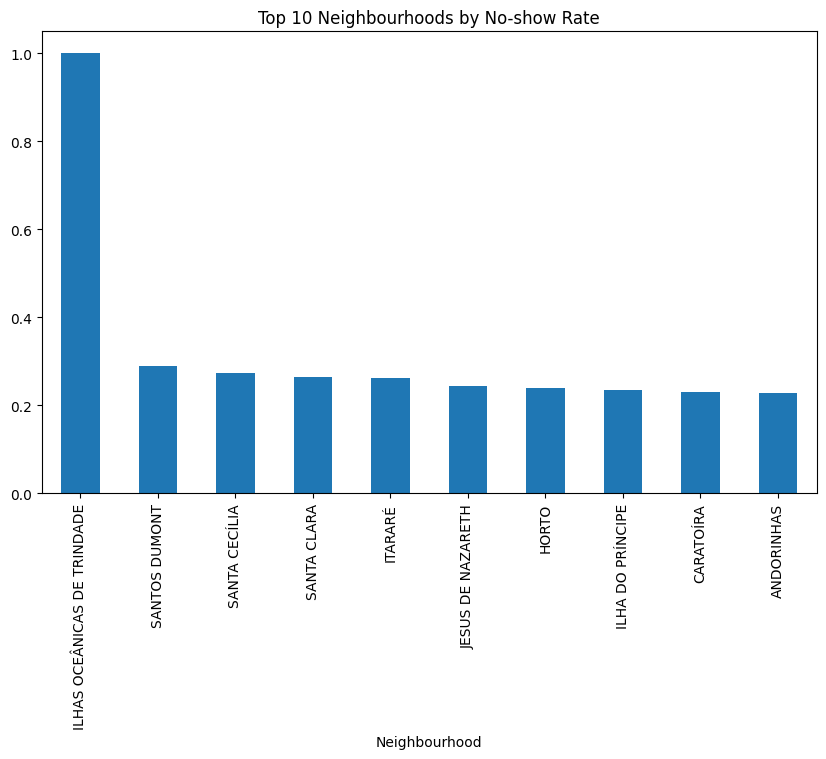

High-risk neighbourhoods: {'JESUS DE NAZARETH', 'ITARARÉ'}


In [73]:
print(df['Neighbourhood'].describe())
print(df['Neighbourhood'].value_counts(normalize=True))

#top 10 neighbourhoods for the number of appointments
df['Neighbourhood'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Neighbourhoods')
plt.xlabel('Number of Appointments')
plt.ylabel('Neighbourhood')
plt.show()

#top 10 neigbourhoods for absence rate
counts = df.groupby(['Neighbourhood', 'No-show']).size().unstack(fill_value=0)
counts['No-show_rate'] = counts['Yes'] / (counts['Yes'] + counts['No'])
counts.sort_values(by='No-show_rate', ascending=False).head(10)

top_rate = counts ['No-show_rate'].sort_values(ascending=False).head(10)
top_rate.plot(kind='bar', figsize=(10,6), title='Top 10 Neighbourhoods by No-show Rate')
plt.show()

# high-risk neighbourhoods
top_volume = set(df['Neighbourhood'].value_counts().head(10).index)

top_noshow = set(counts['No-show_rate'].sort_values(ascending=False).head(10).index)

high_risk_neigh = top_volume.intersection(top_noshow)
print("High-risk neighbourhoods:", high_risk_neigh)



Conclusion: Most communities have a no-show rate concentrated between 15% and 25%.
High-volume communities, such as JARDIM CAMBURI and MARIA ORTIZ, have relatively low and stable no-show rates.
The community with the highest no-show rate is ILHAS OCEÂNICAS DE TRINDADE, reaching 100%, with a very low appointment volume. The high-risk neigbourhoods were JESUS DE NAZARETH and ITARARÉ.